# Machine Learning - Presentation - Team 6

### Team Members - 
##### (1) Ganesh Vasant Kini Kulai
##### (2) Abhishek Kumar Singh
##### (3) Dinu Thomas
##### (4) Charithra Chandrashekar

### Topic - Prediction of bike rental service in a large metropolitan city

![Image](https://www.icebike.org/wp-content/uploads/2015/08/bike-rental-shop-14716686.jpg)

### Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import optimize
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# import function to perform linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from statistics import mean

from sklearn.model_selection import KFold
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import pearsonr

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import datetime

# 1 Exploratory Data Analysis

In [2]:
bikeData = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [3]:
bikeData.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
bikeData.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     08/07/2018  Summer  No Holiday             Yes
freq            24    2208        8328            8465

In [5]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
bikeData['Hour'].describe()

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

In [7]:
bikeData.shape

(8760, 14)

<a id="outliers"></a>
## 1.1 Outlier Analysis and Treatment

**Checking the outliers in all the variables and treat them using appropriate techniques.**

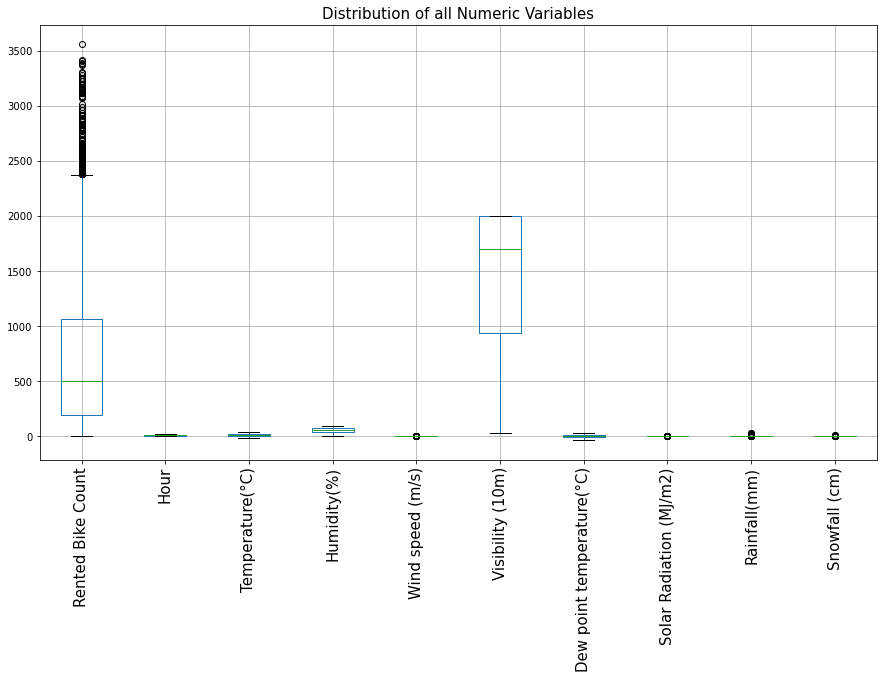

In [8]:
plt.figure(figsize=(15,8))
# plot a boxplot to visualize the outliers in all the numeric variables
bikeData.boxplot()

# set plot label
# set text size using 'fontsize'

plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Rented Bike Count' has a quite large range as compared to the other variables.**

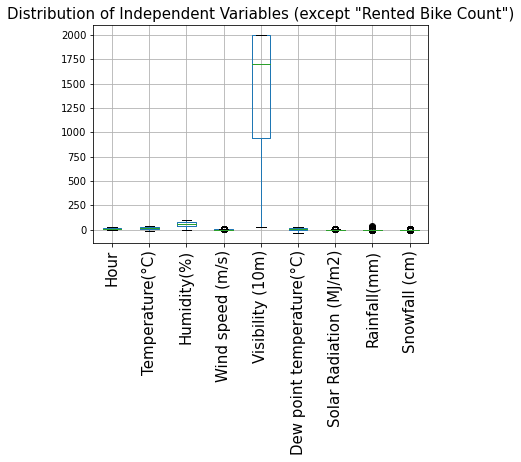

In [9]:
# plot boxplots of all the numeric variables except 'Rented Bike Count' 
# use 'iloc[]' to select the variables except 'Rented Bike Count' 
bikeData.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Rented Bike Count")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an dependent variable 'Rented Bike Count'.**

**Interpretation:** From the above plots, we notice that the variable Rented Bike Count has points above the upper extreme - these points are outliers in the data. 



In [10]:
#Let us use the IQR method to remove the outliers.

In [11]:
bikeData.shape

(8760, 14)

In [12]:
'''# calculate the first quartile
Q1 = bikeData.quantile(0.25)

# calculate the third quartile
Q3 = bikeData.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
bikeData = bikeData[~((bikeData < (Q1 - 3 * IQR)) | (bikeData > (Q3 + 3 * IQR))).any(axis=1)]

# check the shape of the data
bikeData.shape
'''

"# calculate the first quartile\nQ1 = bikeData.quantile(0.25)\n\n# calculate the third quartile\nQ3 = bikeData.quantile(0.75)\n\n# The Interquartile Range (IQR) is defined as the difference between the third and first quartile\n# calculate IQR for each numeric variable\nIQR = Q3 - Q1\n\n# retrieve the dataframe without the outliers\n# '~' returns the values that do not satisfy the given conditions \n# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]\n# '|' is used as 'OR' operator on multiple conditions   \n# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)\nbikeData = bikeData[~((bikeData < (Q1 - 3 * IQR)) | (bikeData > (Q3 + 3 * IQR))).any(axis=1)]\n\n# check the shape of the data\nbikeData.shape\n"

In [13]:
#**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 1.2  Missing Value Analysis and Treatment

**Checking the presence of missing values in the data and treat them.**

In [14]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = bikeData.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (bikeData.isnull().sum()*100/bikeData.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

Total  Percentage of Missing Values
Date                           0                           0.0
Rented Bike Count              0                           0.0
Hour                           0                           0.0
Temperature(°C)                0                           0.0
Humidity(%)                    0                           0.0
Wind speed (m/s)               0                           0.0
Visibility (10m)               0                           0.0
Dew point temperature(°C)      0                           0.0
Solar Radiation (MJ/m2)        0                           0.0
Rainfall(mm)                   0                           0.0
Snowfall (cm)                  0                           0.0
Seasons                        0                           0.0
Holiday                        0                           0.0
Functioning Day                0                           0.0

**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 1.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [15]:
# std() returns the standard deviation of each variable 
bikeData.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

**Interpretation:** As we can see that the variable 'Rainfall(mm)' and 'Snowfall (cm)' has a standard deviation of zero and thus, we keep an eye on it and check this deviation after normalising.

## 1.4 Categorical Variables

### 1.4.1 Converting Hour variable into  buckets

In [16]:
hour_avg = bikeData.groupby('Hour')['Rented Bike Count'].mean().reset_index()
hour_avg.head(5)

Hour  Rented Bike Count
0     0         541.460274
1     1         426.183562
2     2         301.630137
3     3         203.331507
4     4         132.591781

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

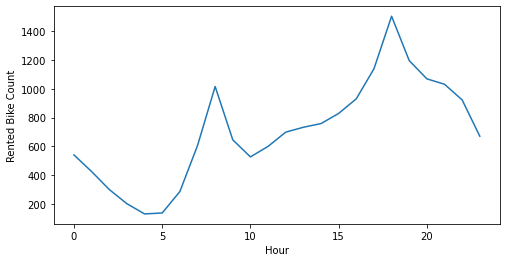

In [17]:
plt.figure(figsize = (8,4))
sns.lineplot(x=hour_avg['Hour'],y=hour_avg['Rented Bike Count'])

The timeseries graph on demand on a day shows a non linear curve. There are some peak periods. So treating hour as a numeric variable can lead to some problems in the model.

Keeping the peaks in mind, lets create some demand buckets.

#### We have made some utility functions for conversions and repetitions

#### 1. Convert hour into  buckets -using utility functions

In [18]:
def convertHourBuckets(hour):
    hour = int(hour)
    if hour < 6:
        # low and decreasing
        return 'early_morning'
    elif hour < 9:
        return 'morning'
    elif hour < 16:
        return 'office_hours'
    elif hour < 20:
        return 'evening'    
    else:
        return 'night'

#### 2. Convert a date into weekend and weekday

In [19]:

def convertDate2Day(date):
    if datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
    elif datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
# Convert a date in the format 12/09/2018 to weekday or weekend if weekend returns 1
# did not consider the middle east standard, as the data is from Korea
def convertDate2Weekend(date):
    day = convertDate2Day(date)
    if day in ["Sunday","Saturday"]:
        return 1
    return 0

In [20]:
#Convert the Hours into 5 buckets
bikeData['Hour_bkt'] = bikeData['Hour'].apply(lambda x : convertHourBuckets(x))

In [21]:
#bikeData['Date'] = bikeData['Date'].apply(lambda x : convertDate2Day(x))

In [22]:
#Convert the Hours into 4 buckets
bikeData['Weekend'] = bikeData['Date'].apply(lambda x : convertDate2Weekend(x))

In [23]:
bikeData.Hour_bkt.unique()

array(['early_morning', 'morning', 'office_hours', 'evening', 'night'],
      dtype=object)

## 1.4.2 n-1 dummy encoding

In [24]:
bikeCatData_enc = pd.get_dummies(bikeData[['Seasons','Hour_bkt','Functioning Day','Holiday']],'',drop_first=True)
bikeCatData_enc.rename(columns={'_Yes':'FunctionDay'},inplace=True)
bikeCatData_enc.head(2)

_Spring  _Summer  _Winter  _evening  _morning  _night  _office_hours  \
0        0        0        1         0         0       0              0   
1        0        0        1         0         0       0              0   

   FunctionDay  _No Holiday  
0            1            1  
1            1            1

In [25]:
bikeData_num = bikeData.select_dtypes(include=[np.number])
#bikeData_num = bikeData_num.drop('Hour',axis = 1)

In [26]:
bikeData_feats = pd.concat([bikeData_num,bikeCatData_enc], axis=1)

In [27]:
bikeData_feats.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)      Weekend  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068     0.284932   
std                   0.868746      1.128193       0.436746     0.451408   
min                   0.000000      0.000000       0.000000     0.000000   
25%                   0.000000      0.000000       0.000000     0.000000   
50%                   0.010000      0.000000       0.000000     0.000000   
75%                   0.930000      0.000000       0.000000     1.000000   
max                   3.520000     35.000000       8.800000     1.000000   

           _Spring      _Summer      _Winter     _evening     _morning  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.252055     0.252055     0.246575     0.166667     0.125000   
std       0.434217     0.434217     0.431042     0.372699     0.330738   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            _night  _office_hours  FunctionDay  _No Holiday  
count  8760.000000    8760.000000  8760.000000  8760.000000  
mean      0.166667       0.291667     0.966324     0.950685  
std       0.372699       0.454556     0.180404     0.216537  
min       0.000000       0.000000     0.000000     0.000000  
25%       0.000000       0.000000     1.000000     1.000000  
50%       0.000000       0.000000     1.000000     1.000000  
75%       0.000000       1.000000     1.000000     1.000000  
max       1.000000       1.000000     1.000000     1.000000

In [28]:
bikeData.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day       Hour_bkt  Weekend  
0             Yes  early_morning        0  
1             Yes  early_morning        0  
2             Yes  early_morning        0  
3             Yes  early_morning        0  
4             Yes  early_morning        0

#### 3. Scaling all together

In [29]:
def standardScale_dataframe(data,name_suffix = "_std"):
    std_scale = StandardScaler()
    variables = []
    numeric_df = data.select_dtypes(include=[np.number])
    for param in numeric_df.columns:
        param_name = param.strip()+name_suffix
        variables.append(param_name)
        if param_name not in (numeric_df.columns):
            print(param_name)
            numeric_df[param_name] = std_scale.fit_transform(data[[param]]) # returns z-scores of the values of the attribute
    return numeric_df,variables


#### 4. Model Performance logged into a dataframe for comparison

In [30]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    mape = np.abs((actual - predicted) / actual)
    mape = mape[~np.isnan(mape)]
    return ((mape) * 100).mean()

def model_metrics(result_df,model,name,remarks,datatype,y,y_hat):

    # calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
    # use 'rsquared' to calculate R-squared value
    # use 'rsquared_adj' to calculate Adjusted R-squared value
    # use 'mean_squared_error' to calculate MSE
    # use 'rmse' to calculate RMSE
    # use 'mean_absolute_error' to calculate MAE
    # use the defined function 'mape' to calculate MAPE
    residuals = model.resid

    MLR_full_model_metrics = pd.Series({'Model_Name': name,
                                        'Data_Type': datatype,
                                        'Remarks': remarks,
                                        'R-squared': model.rsquared,
                                        'Adj. R-squared': model.rsquared_adj,
                                        'Durbin_Watson':statsmodels.stats.stattools.durbin_watson(residuals, axis=0),
                                        'JB_Prob':statsmodels.stats.stattools.jarque_bera(residuals, axis=0)[1],
                                        'Condition_No': model.condition_number,
                                        'MSE': mean_squared_error(y, y_hat),
                                        'RMSE': np.sqrt(mean_squared_error(y, y_hat)),
                                        'MAE': mean_absolute_error(y, y_hat),
                                       })

    
    # append the values to the result table
    result_df = result_df[(result_df.Model_Name != name)]
    result_df = result_df.append(MLR_full_model_metrics, ignore_index = True)

    return result_df

#### 5. Utility function which wraps repeatedly used stuff for lr Models

In [31]:
def lr_model_experiment(df,target,exp_name,remarks,result_df,test_size=0.3,random_state = 123):
    X = df
    X = sm.add_constant(X)
    X = X.drop(target,axis = 1)
    print(X.columns)
    Y = df[target]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state) 
    lin_reg_model = sm.OLS(y_train,x_train).fit()
    
    y_test_predict = lin_reg_model.predict(x_test)

    out_df = model_metrics(result_df,lin_reg_model,exp_name+'_Test',remarks,"Test",y_test,y_test_predict)
    
    y_train_predict = lin_reg_model.predict(x_train)

    out_df = model_metrics(out_df,lin_reg_model,exp_name+'_Train',remarks,"Train",y_train,y_train_predict)
    return out_df,lin_reg_model,len(x_train)

<a id="after"></a>
## 1.5 Model Performance after Transformation

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

#### First, we build the model using the original data.

In [32]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData_feats.copy()

#### Split the data into training and test sets.

In [33]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7008, 20)
y_train (7008,)
X_test (1752, 20)
y_test (1752,)


**Build the multiple linear regression model using the OLS method.**

In [34]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     545.8
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:26   Log-Likelihood:                -52097.
No. Observations:                7008   AIC:                         1.042e+05
Df Residuals:                    6988   BIC:                         1.044e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.



**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.038). Thus, we conclude that there is no autocorrelation.

#### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  0.7028038851271227


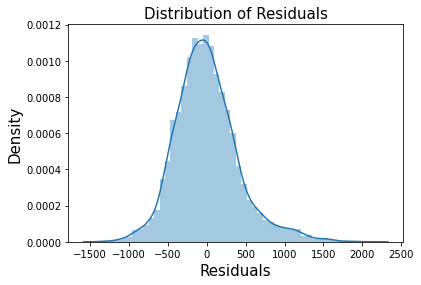

In [35]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

We can see that the distribution of the residuals is positively skewed. Thus, we will apply a log transformation to the target variable.

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

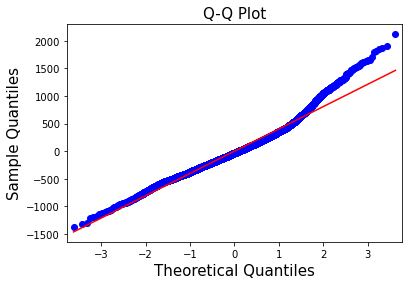

In [36]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 1.3445. We will log transform the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="sqr"></a>
### 1.5.2 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. It can be used on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> sqrt(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply square root transformation on y_train. 

**Square Root Transformation**

In [37]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use square root transformation of y_train 
MLR_model_after_transform = sm.OLS(np.sqrt(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     829.9
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:27   Log-Likelihood:                -23485.
No. Observations:                7008   AIC:                         4.701e+04
Df Residuals:                    6988   BIC:                         4.715e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.573 to 0.656 and the value of Adjusted R-Squared increases from 0.572 to 0.655. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  0.0333132326804559


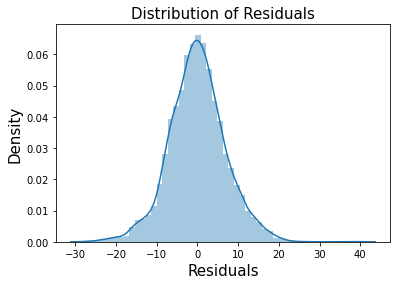

In [38]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

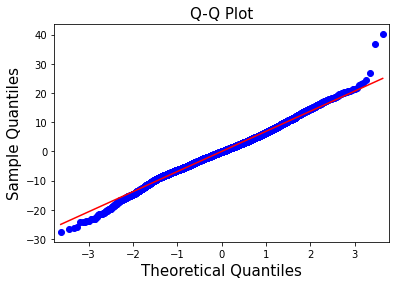

In [39]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

In [40]:
stats.shapiro(MLR_model_after_transform.resid)


ShapiroResult(statistic=0.9942903518676758, pvalue=4.0841321443311595e-16)

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

### 3. Multiple Linear Regression(MLR)

### 3.1.1 Understanding the Features Relations

<Figure size 1080x1080 with 0 Axes>

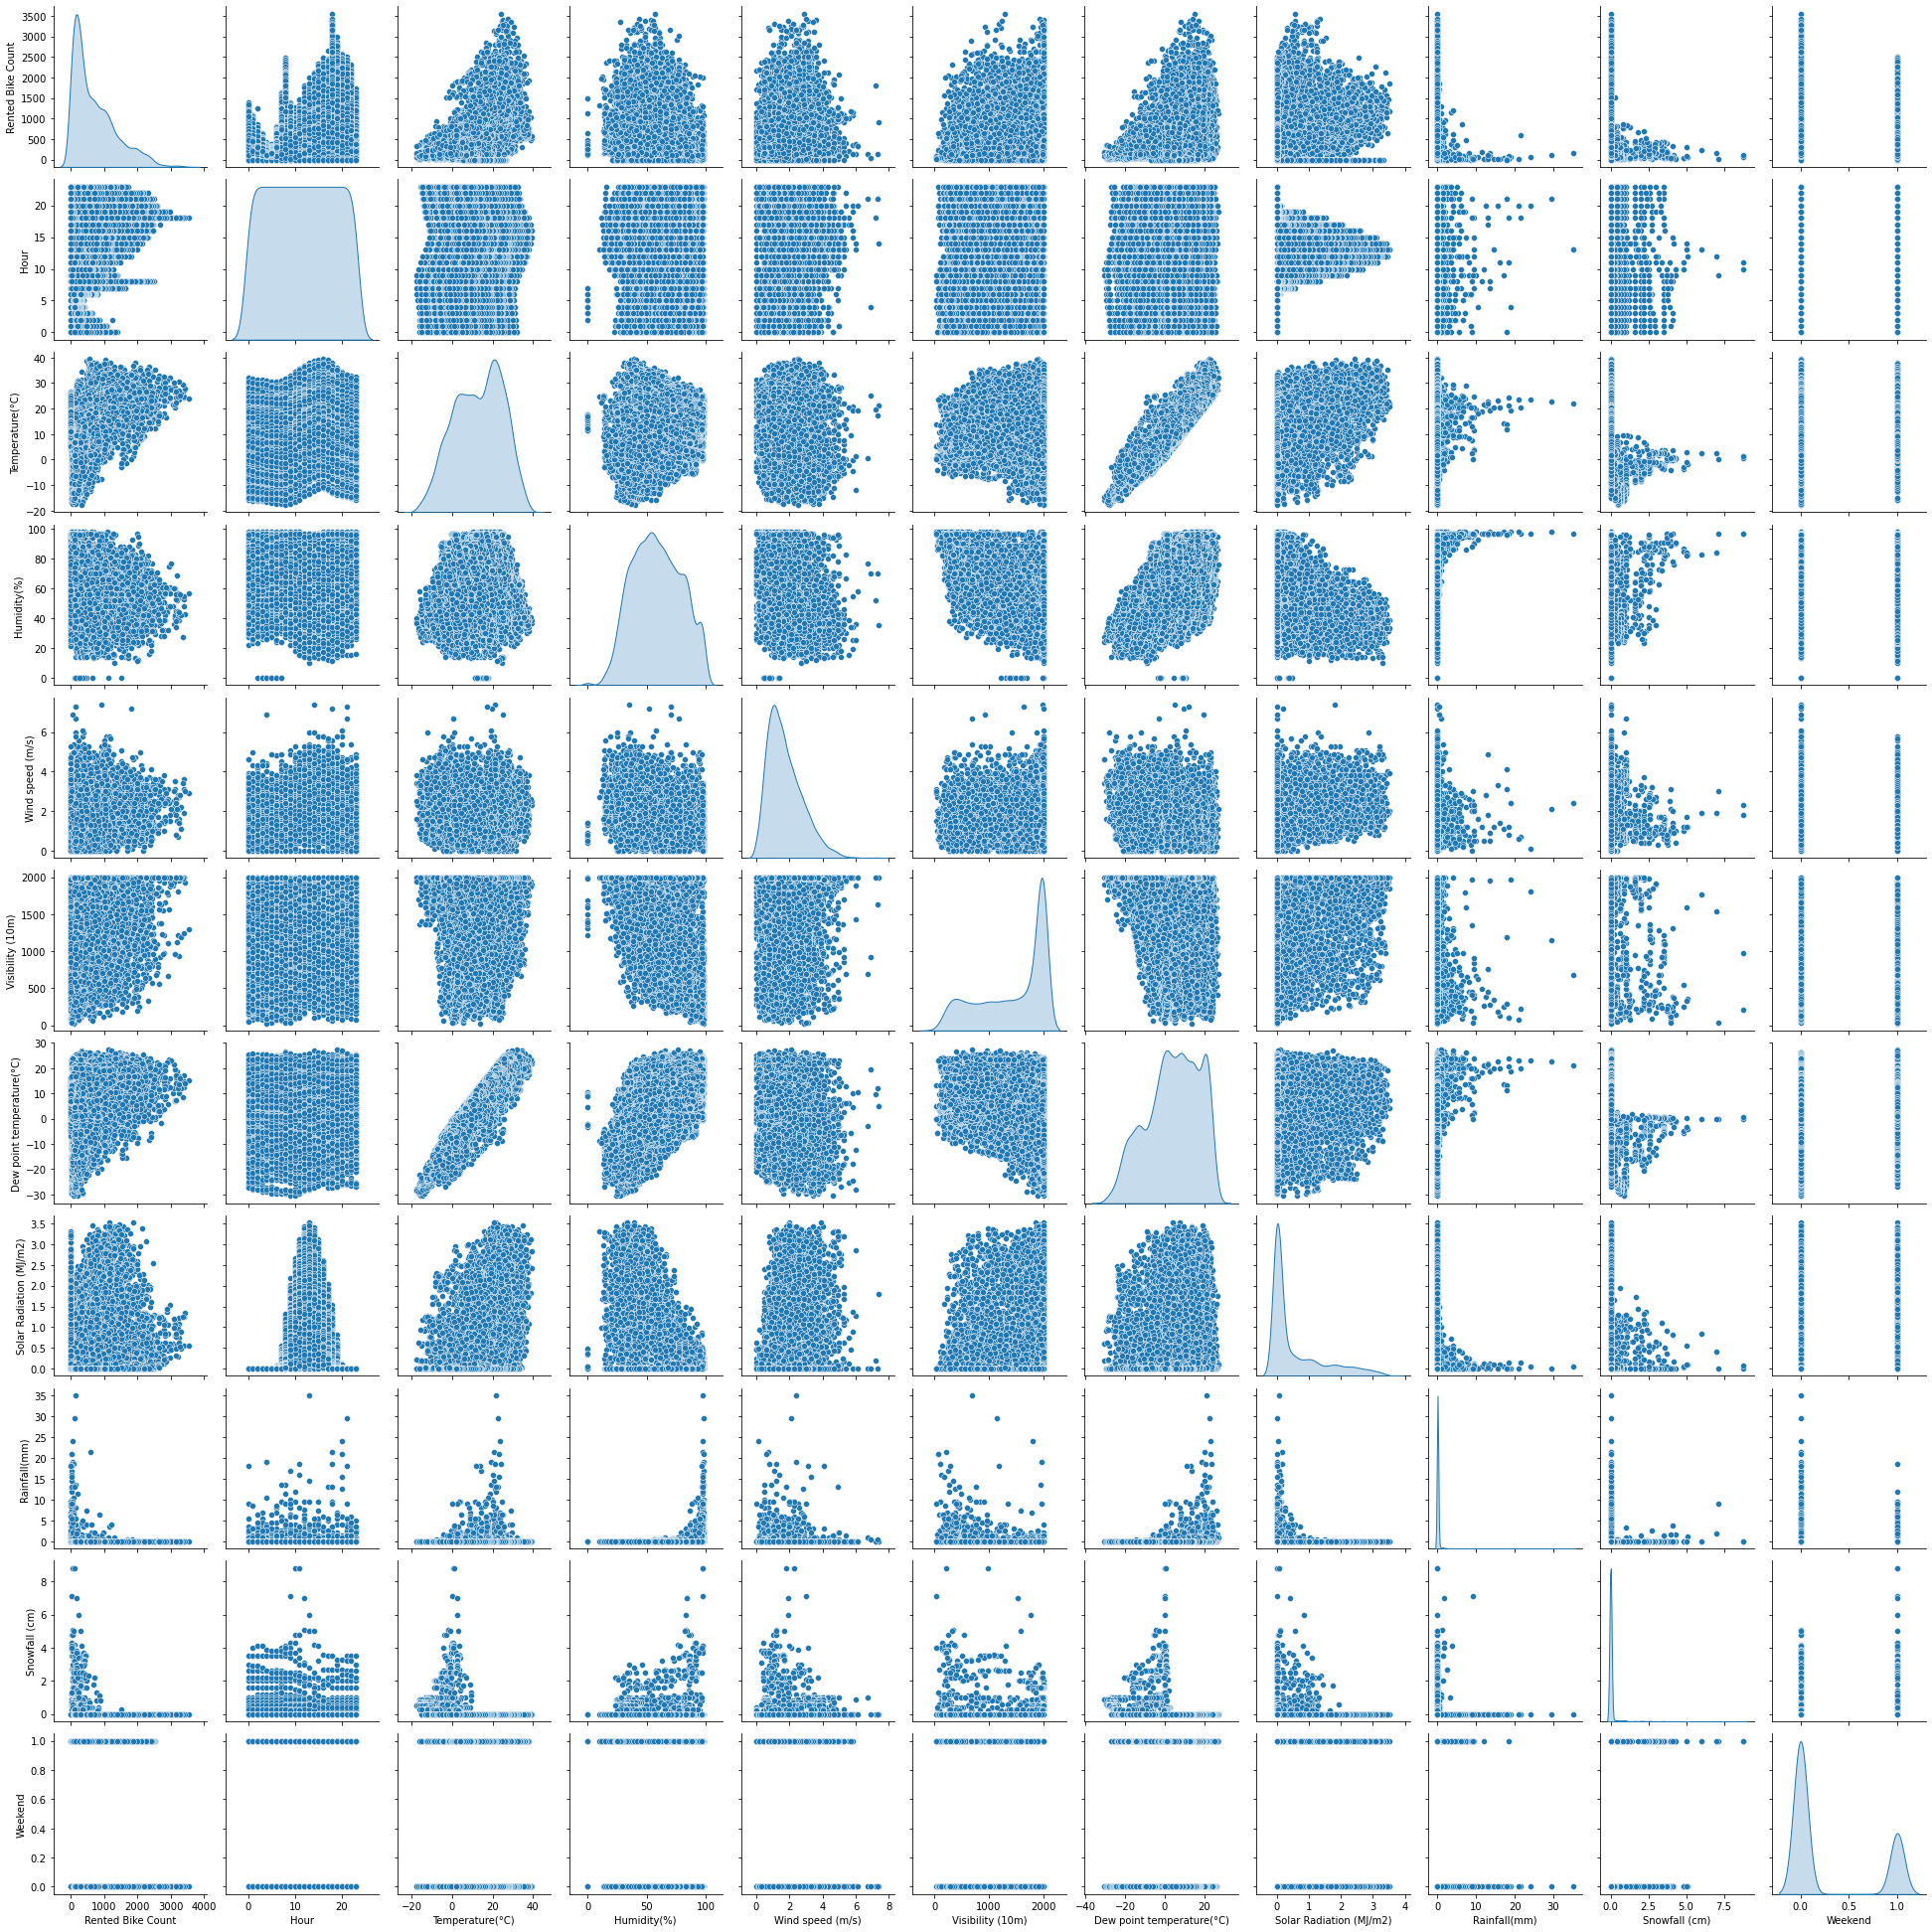

In [41]:
plt.figure(figsize=(15,15))
sns.pairplot(bikeData_num, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

**Observation1: some linearity is identified between Temperature and Dew point temperature**

In [42]:
corr = bikeData_feats.corr()

<AxesSubplot:>

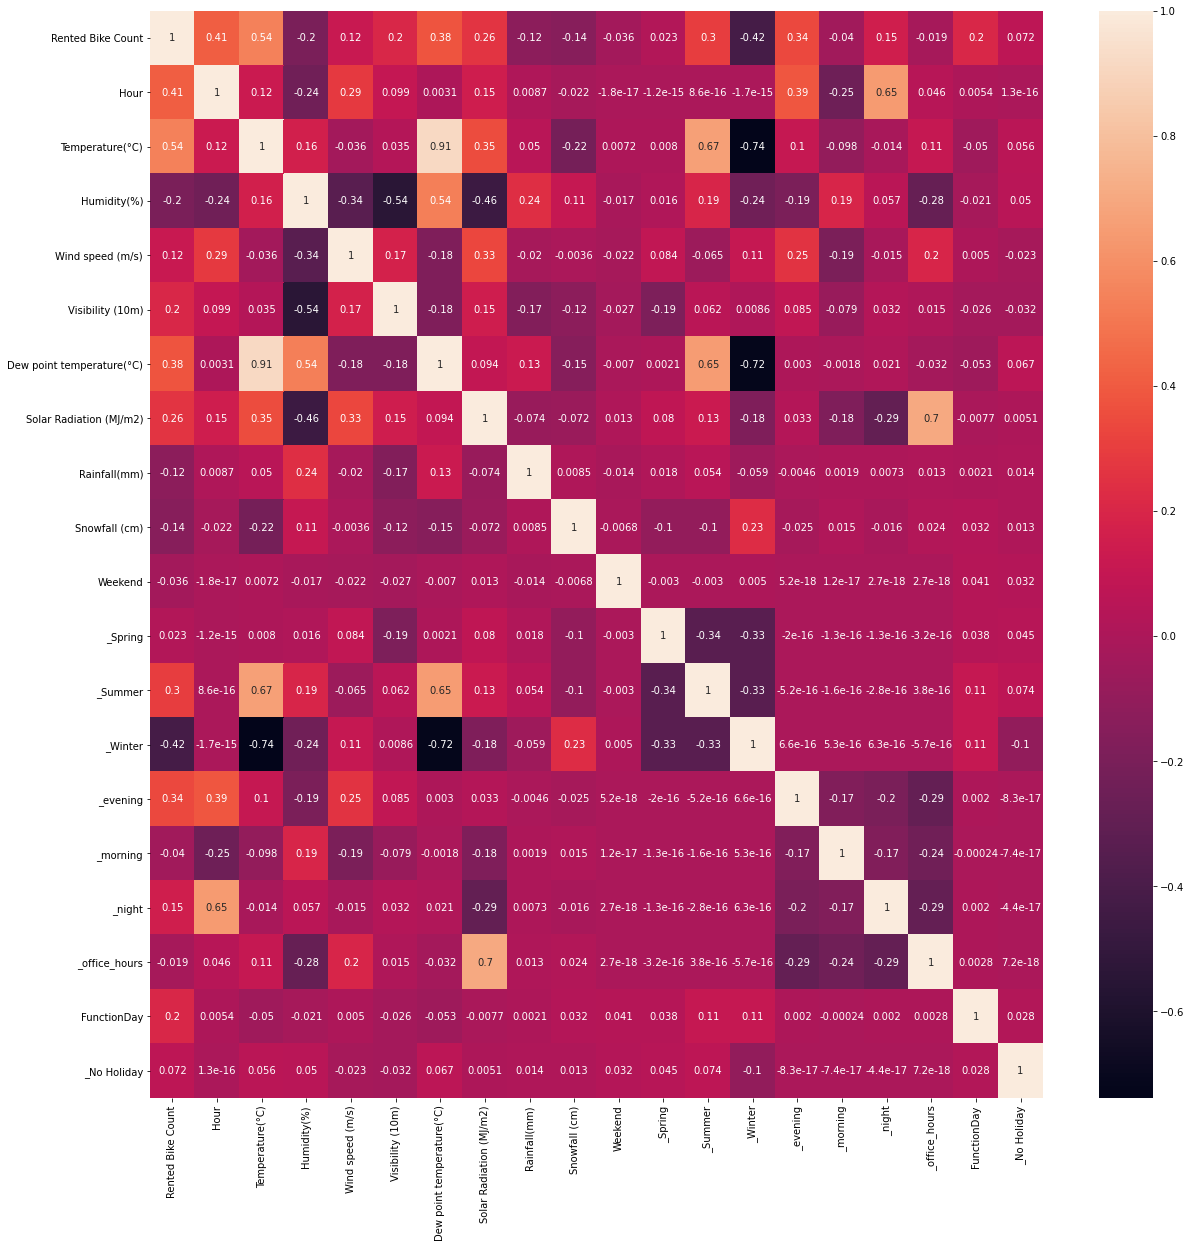

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

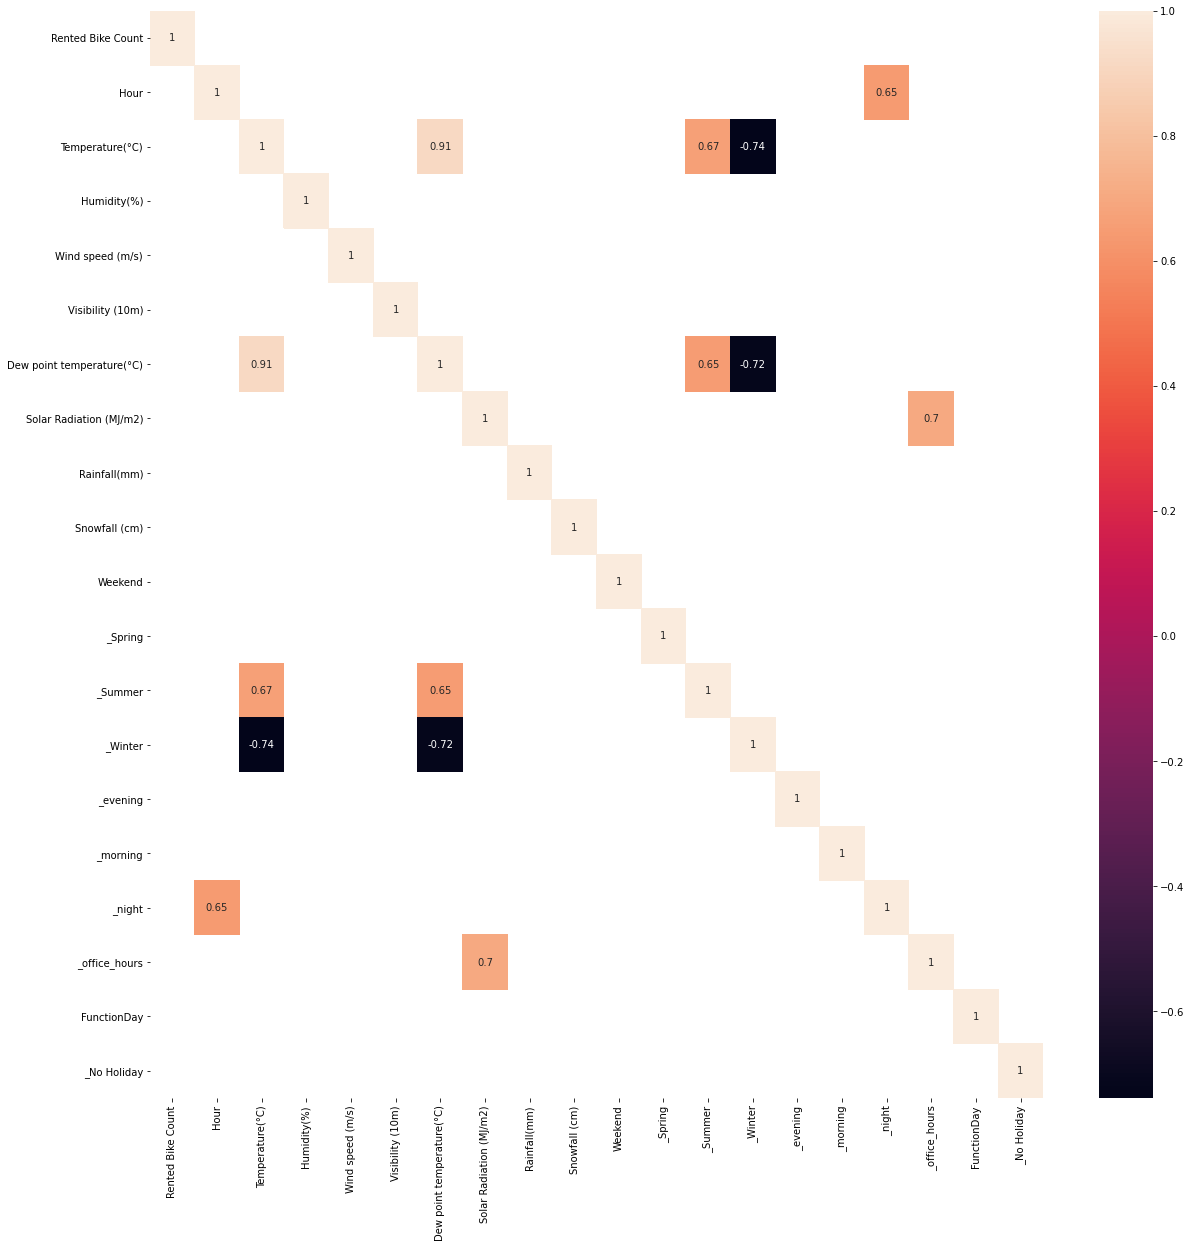

In [44]:
filter_corr = corr[np.abs(corr) > 0.6]
plt.figure(figsize=(20,20))
sns.heatmap(filter_corr, annot=True)

**Observation2: Significant linearity is identified between Temperature with Summer and Winter**

### 3.1.2 Backward Elimination

Backward elimination starts with all regressors in the model.  The F statistic is calculated as we remove regressors on at a time.  In this case, the feature with the smallest F statistic is removed from the model ands the procedure continues until the smallest partial F statistic is greater than the pre-selected cutoff value of F, and terminates otherwise.  This method sounds particularly appealing, when we’d like to see how each variable affects the model.

In [45]:
X = bikeData_feats
#X = sm.add_constant(X)
Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop with p-value - ', worst_feature, '-', worst_pval)
        if not changed:
            break
    return included

In [46]:
backward_regression(x_train, y_train)

Drop with p-value -  _No Holiday - 1.0
Drop with p-value -  _evening - 0.9614292800791007
Drop with p-value -  _Spring - 0.8963830924482085
Drop with p-value -  Snowfall (cm) - 0.9220876481157105
Drop with p-value -  _office_hours - 0.5926962787011043
Drop with p-value -  _night - 0.8450166542459281
Drop with p-value -  Rainfall(mm) - 0.9915245741656983
Drop with p-value -  Wind speed (m/s) - 0.5330515604901082
Drop with p-value -  FunctionDay - 0.965301520248909
Drop with p-value -  Solar Radiation (MJ/m2) - 0.8499135765264251
Drop with p-value -  Humidity(%) - 0.9021968631106094
Drop with p-value -  Temperature(°C) - 1.0
Drop with p-value -  Visibility (10m) - 0.3291061379218556
Drop with p-value -  _morning - 0.2649634396564344


['Rented Bike Count',
 'Hour',
 'Dew point temperature(°C)',
 'Weekend',
 '_Summer',
 '_Winter']

### 3.1.3 Forward Selection

Forward elimination starts with no features, and the insertion of features into the regression model one-by-one.  First, the regressor with the highest correlation is selected for inclusion, which coincidentally the regressor that produces the largest F-statistic value when testing the significance of the model.  This is called partial correlation because technically they represent the correlation coefficients between the model residuals with a specific variable and  the model residuals with the other regressors.  All subsequent regressors are selected the same way.  The procedure continues until the F statistic exceeds a pre-selected F-value (called F-to-enter) and terminates otherwise.

In [47]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [48]:
forward_regression(x_train, y_train, 0.05)

['Rented Bike Count',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Humidity(%)',
 'Visibility (10m)',
 '_Summer',
 '_office_hours',
 'Wind speed (m/s)',
 '_evening',
 'Weekend',
 'Hour',
 'Rainfall(mm)',
 '_Spring',
 'FunctionDay',
 'Temperature(°C)',
 '_No Holiday']

### 3.1.4 Recursive Feature Elimination

RFE selects features by considering a smaller and smaller set of regressors.  The starting point is the original set of regressors. Less important regressors are recursively pruned from the initial set.  The procedure is repeated until a desired set of features remain.  That number can either be a priori specified, or can be found using cross validation. In fact, RFE offers a variant – RFECV – designed to optimally find the best subset of regressors.

In [49]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = x_train
y = y_train
names=pd.DataFrame(x_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

0
0    1
1    6
2   10
3   12
4    8
5   16
6    9
7    7
8   11
9   15
10  14
11   1
12   1
13   1
14   3
15   4
16   5
17   2
18   1
19  13

In [50]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

              Feature  Rank
0   Rented Bike Count     1
11            _Spring     1
12            _Summer     1
13            _Winter     1
18        FunctionDay     1


5

### 3.1.5 Variance Inflation Factor

In [51]:
# filter the numerical features in the dataset
bikeData_numeric_features_vif = bikeData_feats.select_dtypes(include=[np.number])

# display the first five observations
bikeData_numeric_features_vif.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Weekend  _Spring  _Summer  _Winter  _evening  \
0           0.0            0.0        0        0        0        1         0   
1           0.0            0.0        0        0        0        1         0   
2           0.0            0.0        0        0        0        1         0   
3           0.0            0.0        0        0        0        1         0   
4           0.0            0.0        0        0        0        1         0   

   _morning  _night  _office_hours  FunctionDay  _No Holiday  
0         0       0              0            1            1  
1         0       0              0            1            1  
2         0       0              0            1            1  
3         0       0              0            1            1  
4         0       0              0            1            1

In [52]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = bikeData_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                   Features
0    76.929951                       Hour
1    53.820334            Temperature(°C)
2    35.638705                FunctionDay
3    35.178548  Dew point temperature(°C)
4    32.740501                Humidity(%)
5    27.667073                     _night
6    20.004895                _No Holiday
7    17.987122                   _evening
8    14.717385              _office_hours
9     9.948649           Visibility (10m)
10    5.509891    Solar Radiation (MJ/m2)
11    5.437224          Rented Bike Count
12    5.115894           Wind speed (m/s)
13    4.590959                    _Winter
14    3.583802                    _Summer
15    2.716752                   _morning
16    2.328025                    _Spring
17    1.423342                    Weekend
18    1.146480              Snowfall (cm)
19    1.120316               Rainfall(mm)

In [53]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(bikeData_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = bikeData_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        bikeData_numeric_features_vif = bikeData_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     4.245508          Rented Bike Count
1     4.839306           Wind speed (m/s)
2     4.825505           Visibility (10m)
3     3.738429  Dew point temperature(°C)
4     3.972031    Solar Radiation (MJ/m2)
5     1.101865               Rainfall(mm)
6     1.099008              Snowfall (cm)
7     1.359348                    Weekend
8     1.730946                    _Spring
9     3.156508                    _Summer
10    3.152215                    _Winter
11    2.492041                   _evening
12    1.459617                   _morning
13    1.974552                     _night
14    4.245161              _office_hours


### 3.2 Model Building

In [54]:
Model_Features = list(bikeData_feats.columns)
Model_Features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Weekend',
 '_Spring',
 '_Summer',
 '_Winter',
 '_evening',
 '_morning',
 '_night',
 '_office_hours',
 'FunctionDay',
 '_No Holiday']

In [55]:
Target_Variable = ['Rented Bike Count']

**Make a result dataframe**

In [56]:
#Model Parameters to be compared in each experiments
cols = ['Model_Name','Data_Type','Remarks', 
        'R-squared','Adj. R-squared', 
        'Durbin_Watson', 'JB_Prob', 'Condition_No',
        'MSE', 'RMSE', 'MAE']
# creating a empty dataframe of the colums
result_table_e3_set = pd.DataFrame(columns = cols)

In [57]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats,Target_Variable,"BIKE_LR_ALL_E31",
                                                              "All variables, no tranformation,\
                                                               no scaling, only categorical encoding",
                                                               result_table_e3_set,0.3,123)


Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend',
       '_Spring', '_Summer', '_Winter', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [58]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     477.5
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:53   Log-Likelihood:                -45622.
No. Observations:                6132   AIC:                         9.128e+04
Df Residuals:                    6112   BIC:                         9.142e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -12.4231    114.496     -0.109      0.914    -236.875     212.029
Hour                         -3.8710      3.440     -1.125      0.261     -10.615       2.873
Temperature(°C)              11.2744      4.310      2.616      0.009       2.826      19.723
Humidity(%)                 -10.9241      1.194     -9.149      0.000     -13.265      -8.583
Wind speed (m/s)             10.9147      5.985      1.824      0.068      -0.818      22.647
Visibility (10m)              0.0142      0.011      1.253      0.210      -0.008       0.036
Dew point temperature(°C)    14.8610      4.481      3.317      0.001       6.077      23.645
Solar Radiation (MJ/m2)      14.9117     11.985      1.244      0.213      -8.582      38.406
Rainfall(mm)                -52.5905      4.614    -11.399      0.000     -61.635     -43.546
Snowfall (cm)                29.2823     13.035      2.246      0.025       3.728      54.836
Weekend                     -82.8513     11.740     -7.057      0.000    -105.866     -59.837
_Spring                    -152.5882     15.884     -9.606      0.000    -183.727    -121.449
_Summer                    -163.9038     19.674     -8.331      0.000    -202.472    -125.336
_Winter                    -355.9074     22.568    -15.771      0.000    -400.148    -311.667
_evening                    693.5443     53.948     12.856      0.000     587.787     799.302
_morning                    367.5376     23.988     15.322      0.000     320.513     414.562
_night                      604.8691     67.365      8.979      0.000     472.809     736.929
_office_hours               168.4215     37.469      4.495      0.000      94.969     241.874
FunctionDay                 941.1423     30.901     30.457      0.000     880.566    1001.719
_No Holiday                 129.2747     24.597      5.256      0.000      81.056     177.493
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                     3.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
result_table_e3_set.tail()

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...   0.597506   
1  All variables, no tranformation,              ...   0.597506   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.596254        2.02301  1.083288e-265  33978.113374  163841.693774   
1        0.596254        2.02301  1.083288e-265  33978.113374  169737.350888   

         RMSE         MAE  
0  404.773633  311.850464  
1  411.991931  308.797194

### 3.3 Model Evaluation

#### 3.3.1 Determinant of correlaton Matrix

***Let D be the determinant of correlation matrix. \
Then 0 < D < 1\
D=0 High multicollinearity\
D=1 No multicollinearit***

In [60]:
bikeData_feats_noTarget = bikeData_feats.drop(Target_Variable,axis=1)
np.linalg.det(bikeData_feats_noTarget.corr())

2.1650769445812497e-06

#### 3.3.2 Condition Number

***CN > 1000 Severe multicollinearity\
100 < CN < 1000 Moderate multicollinearity\
100 < CN No multicollinearity***

In [61]:
print("Condition Number is very High = ",lr_model.condition_number)

Condition Number is very High =  33978.113373631924


#### Experiment 2

Reduce some features which are shown as linear from the heatmap

In [62]:
bikeData_feats_e32 = bikeData_feats.drop(['_Summer', '_Winter','Dew point temperature(°C)'],axis=1)

In [63]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E32",
                                                              "Base = BIKE_LR_ALL_E32,\
                                                               Removed high correlations",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [64]:
result_table_e3_set.tail()

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...   0.597506   
1  All variables, no tranformation,              ...   0.597506   
2  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
3  Base = BIKE_LR_ALL_E32,                       ...   0.572561   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.596254       2.023010  1.083288e-265  33978.113374  163841.693774   
1        0.596254       2.023010  1.083288e-265  33978.113374  169737.350888   
2        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
3        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   

         RMSE         MAE  
0  404.773633  311.850464  
1  411.991931  308.797194  
2  418.342093  321.746175  
3  424.566818  317.950913

<AxesSubplot:>

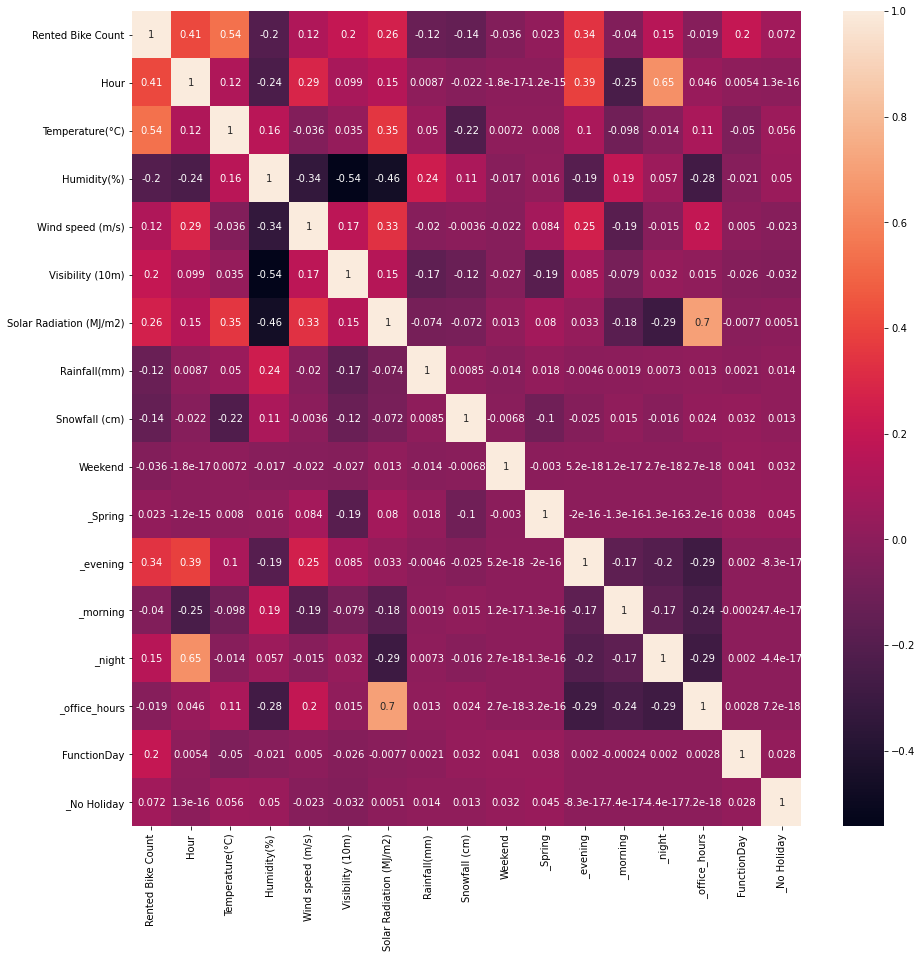

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(bikeData_feats_e32.corr(),annot=True)

#### Experiment 3

Reduce some more  features which are showing linearity near to 5

In [66]:
bikeData_feats_e33 = bikeData_feats.drop(['_Summer', '_Winter',\
                                          'Dew point temperature(°C)',\
                                          'Humidity(%)','_night'],axis=1)

In [67]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E33",
                                                              "Removed correlation near to |0.5|,\
                                                               base BIKE_LR_ALL_E32",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Weekend', '_Spring', '_evening', '_morning', '_night',
       '_office_hours', 'FunctionDay', '_No Holiday'],
      dtype='object')


In [68]:
result_table_e3_set.tail()

Model_Name Data_Type  \
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   

                                             Remarks  R-squared  \
1  All variables, no tranformation,              ...   0.597506   
2  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
3  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
4  Removed correlation near to |0.5|,            ...   0.572561   
5  Removed correlation near to |0.5|,            ...   0.572561   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
1        0.596254       2.023010  1.083288e-265  33978.113374  169737.350888   
2        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
3        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   
4        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
5        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   

         RMSE         MAE  
1  411.991931  308.797194  
2  418.342093  321.746175  
3  424.566818  317.950913  
4  418.342093  321.746175  
5  424.566818  317.950913

***Observation: No Improvement has been observed from Experiment 32***

#### Experiment 4

Lets Scale the Data

In [69]:
bikeData_feats_e34,var_names = standardScale_dataframe(bikeData_feats)

Rented Bike Count_std
Hour_std
Temperature(°C)_std
Humidity(%)_std
Wind speed (m/s)_std
Visibility (10m)_std
Dew point temperature(°C)_std
Solar Radiation (MJ/m2)_std
Rainfall(mm)_std
Snowfall (cm)_std
Weekend_std
_Spring_std
_Summer_std
_Winter_std
_evening_std
_morning_std
_night_std
_office_hours_std
FunctionDay_std
_No Holiday_std


In [70]:
bikeData_feats_e34_std = bikeData_feats_e34[var_names]


In [71]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e34_std,['Rented Bike Count_std'],"BIKE_LR_ALL_E34",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


In [72]:
result_table_e3_set.tail()

Model_Name Data_Type  \
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   
6   BIKE_LR_ALL_E34_Test      Test   
7  BIKE_LR_ALL_E34_Train     Train   

                                             Remarks  R-squared  \
3  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
4  Removed correlation near to |0.5|,            ...   0.572561   
5  Removed correlation near to |0.5|,            ...   0.572561   
6                   input and output variable scaled   0.597506   
7                   input and output variable scaled   0.597506   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
3        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   
4        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
5        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   
6        0.596254       2.023010  1.083288e-265     27.853776       0.393875   
7        0.596254       2.023010  1.083288e-265     27.853776       0.408048   

         RMSE         MAE  
3  424.566818  317.950913  
4  418.342093  321.746175  
5  424.566818  317.950913  
6    0.627594    0.483519  
7    0.638786    0.478785

In [73]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Rented Bike Count_std   R-squared:                       0.598
Model:                               OLS   Adj. R-squared:                  0.596
Method:                    Least Squares   F-statistic:                     477.5
Date:                   Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                           23:16:56   Log-Likelihood:                -5952.7
No. Observations:                   6132   AIC:                         1.195e+04
Df Residuals:                       6112   BIC:                         1.208e+04
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0046      0.008      0.563      0.573      -0.011       0.021
Hour_std                         -0.0415      0.037     -1.125      0.261      -0.114       0.031
Temperature(°C)_std               0.2088      0.080      2.616      0.009       0.052       0.365
Humidity(%)_std                  -0.3449      0.038     -9.149      0.000      -0.419      -0.271
Wind speed (m/s)_std              0.0175      0.010      1.824      0.068      -0.001       0.036
Visibility (10m)_std              0.0134      0.011      1.253      0.210      -0.008       0.034
Dew point temperature(°C)_std     0.3009      0.091      3.317      0.001       0.123       0.479
Solar Radiation (MJ/m2)_std       0.0201      0.016      1.244      0.213      -0.012       0.052
Rainfall(mm)_std                 -0.0920      0.008    -11.399      0.000      -0.108      -0.076
Snowfall (cm)_std                 0.0198      0.009      2.246      0.025       0.003       0.037
Weekend_std                      -0.0580      0.008     -7.057      0.000      -0.074      -0.042
_Spring_std                      -0.1027      0.011     -9.606      0.000      -0.124      -0.082
_Summer_std                      -0.1103      0.013     -8.331      0.000      -0.136      -0.084
_Winter_std                      -0.2378      0.015    -15.771      0.000      -0.267      -0.208
_evening_std                      0.4008      0.031     12.856      0.000       0.340       0.462
_morning_std                      0.1885      0.012     15.322      0.000       0.164       0.213
_night_std                        0.3495      0.039      8.979      0.000       0.273       0.426
_office_hours_std                 0.1187      0.026      4.495      0.000       0.067       0.170
FunctionDay_std                   0.2632      0.009     30.457      0.000       0.246       0.280
_No Holiday_std                   0.0434      0.008      5.256      0.000       0.027       0.060
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Experiment 5

No Scaling of Target Variable

In [74]:
bikeData_feats_e35_std = bikeData_feats_e34[var_names]
bikeData_feats_e35_std.drop('Rented Bike Count_std', axis=1, inplace=True)
bikeData_feats_e35_std = pd.concat([bikeData_feats_e35_std,bikeData['Rented Bike Count']],axis=1)

bikeData_feats_e35_std.head(3)

Hour_std  Temperature(°C)_std  Humidity(%)_std  Wind speed (m/s)_std  \
0 -1.661325            -1.513957        -1.042483              0.458476   
1 -1.516862            -1.539074        -0.993370             -0.892561   
2 -1.372399            -1.580936        -0.944257             -0.699556   

   Visibility (10m)_std  Dew point temperature(°C)_std  \
0              0.925871                      -1.659605   
1              0.925871                      -1.659605   
2              0.925871                      -1.667262   

   Solar Radiation (MJ/m2)_std  Rainfall(mm)_std  Snowfall (cm)_std  \
0                    -0.655132           -0.1318          -0.171891   
1                    -0.655132           -0.1318          -0.171891   
2                    -0.655132           -0.1318          -0.171891   

   Weekend_std  _Spring_std  _Summer_std  _Winter_std  _evening_std  \
0    -0.631243    -0.580514    -0.580514     1.748015     -0.447214   
1    -0.631243    -0.580514    -0.580514     1.748015     -0.447214   
2    -0.631243    -0.580514    -0.580514     1.748015     -0.447214   

   _morning_std  _night_std  _office_hours_std  FunctionDay_std  \
0     -0.377964   -0.447214          -0.641689          0.18668   
1     -0.377964   -0.447214          -0.641689          0.18668   
2     -0.377964   -0.447214          -0.641689          0.18668   

   _No Holiday_std  Rented Bike Count  
0         0.227757                254  
1         0.227757                204  
2         0.227757                173

In [75]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e35_std,
                                                              ['Rented Bike Count'],"BIKE_LR_ALL_E35",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Dew point temperature(°C)_std', 'Solar Radiation (MJ/m2)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_night_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


In [76]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     477.5
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:16:56   Log-Likelihood:                -45622.
No. Observations:                6132   AIC:                         9.128e+04
Df Residuals:                    6112   BIC:                         9.142e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           707.5715      5.271    134.233      0.000     697.238     717.905
Hour_std                        -26.7959     23.812     -1.125      0.261     -73.477      19.885
Temperature(°C)_std             134.6636     51.476      2.616      0.009      33.752     235.575
Humidity(%)_std                -222.4286     24.311     -9.149      0.000    -270.087    -174.770
Wind speed (m/s)_std             11.3103      6.202      1.824      0.068      -0.847      23.468
Visibility (10m)_std              8.6461      6.900      1.253      0.210      -4.879      22.172
Dew point temperature(°C)_std   194.0787     58.517      3.317      0.001      79.365     308.792
Solar Radiation (MJ/m2)_std      12.9538     10.411      1.244      0.213      -7.455      33.363
Rainfall(mm)_std                -59.3289      5.205    -11.399      0.000     -69.532     -49.126
Snowfall (cm)_std                12.7882      5.693      2.246      0.025       1.628      23.948
Weekend_std                     -37.3976      5.299     -7.057      0.000     -47.786     -27.009
_Spring_std                     -66.2526      6.897     -9.606      0.000     -79.773     -52.732
_Summer_std                     -71.1658      8.542     -8.331      0.000     -87.912     -54.420
_Winter_std                    -153.4022      9.727    -15.771      0.000    -172.471    -134.334
_evening_std                    258.4687     20.105     12.856      0.000     219.055     297.882
_morning_std                    121.5517      7.933     15.322      0.000     106.000     137.104
_night_std                      225.4214     25.106      8.979      0.000     176.206     274.637
_office_hours_std                76.5526     17.031      4.495      0.000      43.166     109.939
FunctionDay_std                 169.7758      5.574     30.457      0.000     158.848     180.703
_No Holiday_std                  27.9912      5.326      5.256      0.000      17.551      38.432
==============================================================================
Omnibus:                      678.582   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1220.210
Skew:                           0.745   Prob(JB):                    1.08e-265
Kurtosis:                       4.598   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
result_table_e3_set.tail(20)

Model_Name Data_Type  \
0   BIKE_LR_ALL_E31_Test      Test   
1  BIKE_LR_ALL_E31_Train     Train   
2   BIKE_LR_ALL_E32_Test      Test   
3  BIKE_LR_ALL_E32_Train     Train   
4   BIKE_LR_ALL_E33_Test      Test   
5  BIKE_LR_ALL_E33_Train     Train   
6   BIKE_LR_ALL_E34_Test      Test   
7  BIKE_LR_ALL_E34_Train     Train   
8   BIKE_LR_ALL_E35_Test      Test   
9  BIKE_LR_ALL_E35_Train     Train   

                                             Remarks  R-squared  \
0  All variables, no tranformation,              ...   0.597506   
1  All variables, no tranformation,              ...   0.597506   
2  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
3  Base = BIKE_LR_ALL_E32,                       ...   0.572561   
4  Removed correlation near to |0.5|,            ...   0.572561   
5  Removed correlation near to |0.5|,            ...   0.572561   
6                   input and output variable scaled   0.597506   
7                   input and output variable scaled   0.597506   
8                   input and output variable scaled   0.597506   
9                   input and output variable scaled   0.597506   

   Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
0        0.596254       2.023010  1.083288e-265  33978.113374  163841.693774   
1        0.596254       2.023010  1.083288e-265  33978.113374  169737.350888   
2        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
3        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   
4        0.571442       2.016956  2.527486e-224  27505.889001  175010.106861   
5        0.571442       2.016956  2.527486e-224  27505.889001  180256.982643   
6        0.596254       2.023010  1.083288e-265     27.853776       0.393875   
7        0.596254       2.023010  1.083288e-265     27.853776       0.408048   
8        0.596254       2.023010  1.083288e-265     27.853776  163841.693774   
9        0.596254       2.023010  1.083288e-265     27.853776  169737.350888   

         RMSE         MAE  
0  404.773633  311.850464  
1  411.991931  308.797194  
2  418.342093  321.746175  
3  424.566818  317.950913  
4  418.342093  321.746175  
5  424.566818  317.950913  
6    0.627594    0.483519  
7    0.638786    0.478785  
8  404.773633  311.850464  
9  411.991931  308.797194

#### 3.3.2.1 Condition Number

***The Conditions Number has been reduced after the scaling of the data***

In [78]:
print("Condition Number is now normal after the scale transformations = ",lr_model.condition_number)

Condition Number is now normal after the scale transformations =  27.853776138781768


#### 3.3.3 Existence of linear relationship

The independent variables must have a linear relationship with the dependent 
variable

In [79]:
import math

def plot_residual_linearity(residual,predictors,figsize=(10,6)):
    N = len(predictors.columns)
    rows = math.ceil(N/3)
    if rows == 0:
        return
    
    fig, axs = plt.subplots(rows,3, figsize=figsize)
    fig.subplots_adjust(hspace = .2, wspace=.2)

    axs = axs.ravel()
    
    i = 0
    for pred in predictors.columns:
        sns.scatterplot(x = predictors[pred],y=residual,ax=axs[i] )
        i +=1
        

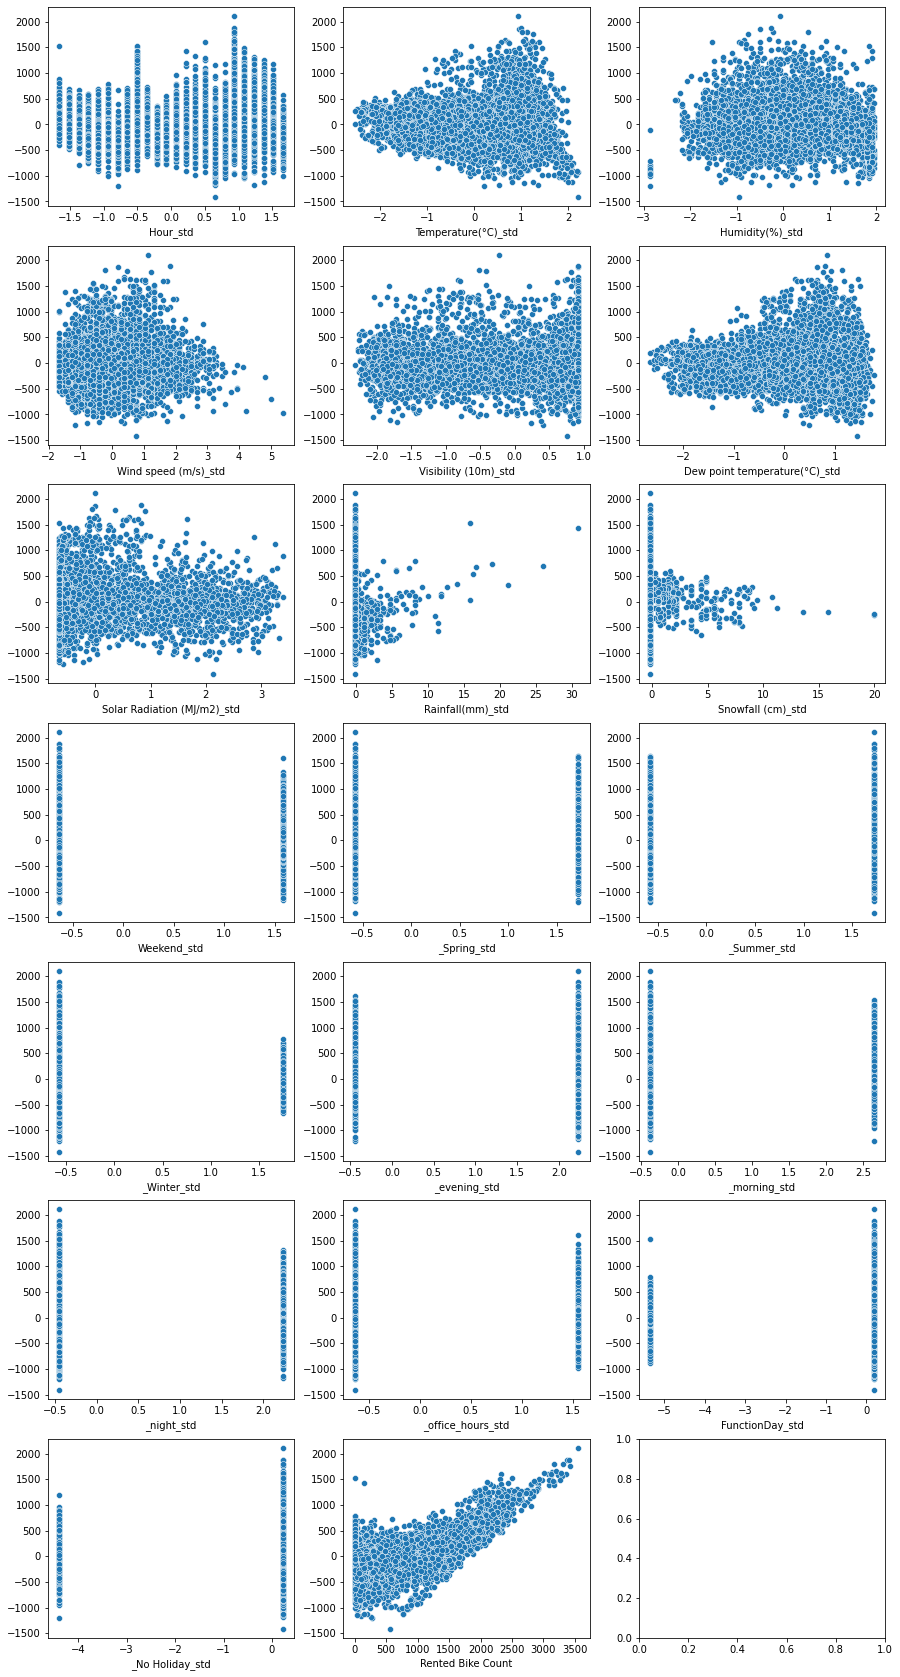

In [80]:

plot_residual_linearity(lr_model.resid,bikeData_feats_e35_std,figsize=(15, 30))

***Observation: There is no specific pattern observed between predictors and residuals***

A scatter plot depicting no pattern indicates that the variable has a linear relationship with the response variable. 

we see a random pattern in all the plots of independent. Hence, we may say that, the predictors are linearly related with the response variable

Relation is seen only with the target variable as it was present in the input dataframe.

#### 3.3.4 Assumption of autocorrelation


Assumption of autocorrelation is violated when residuals are correlated within 
themselves, i.e. they are serially correlated

To test whether the error terms are autocorrelated,we do Durbin-Watson test

In [81]:
statsmodels.stats.stattools.durbin_watson(lr_model.resid, axis=0)

2.0230100622424048

If the value is near to 2, then there is No autocorrelation

#### 3.3.5 Homoscedasticity assumption

In [82]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

8.224898319181726e-223


There are two big reasons why we need homoscedasticity: While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. ... This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase.

***Observation: As per the test, the error terms are heteroskedastic***

#### Experiment 6

Trying to redude heteroskedasticity by removing RainFall and Snow Fall from the model, as the above scatter plot have shown a funnel like pattern.

In [83]:
bikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Hour_bkt', 'Weekend'],
      dtype='object')

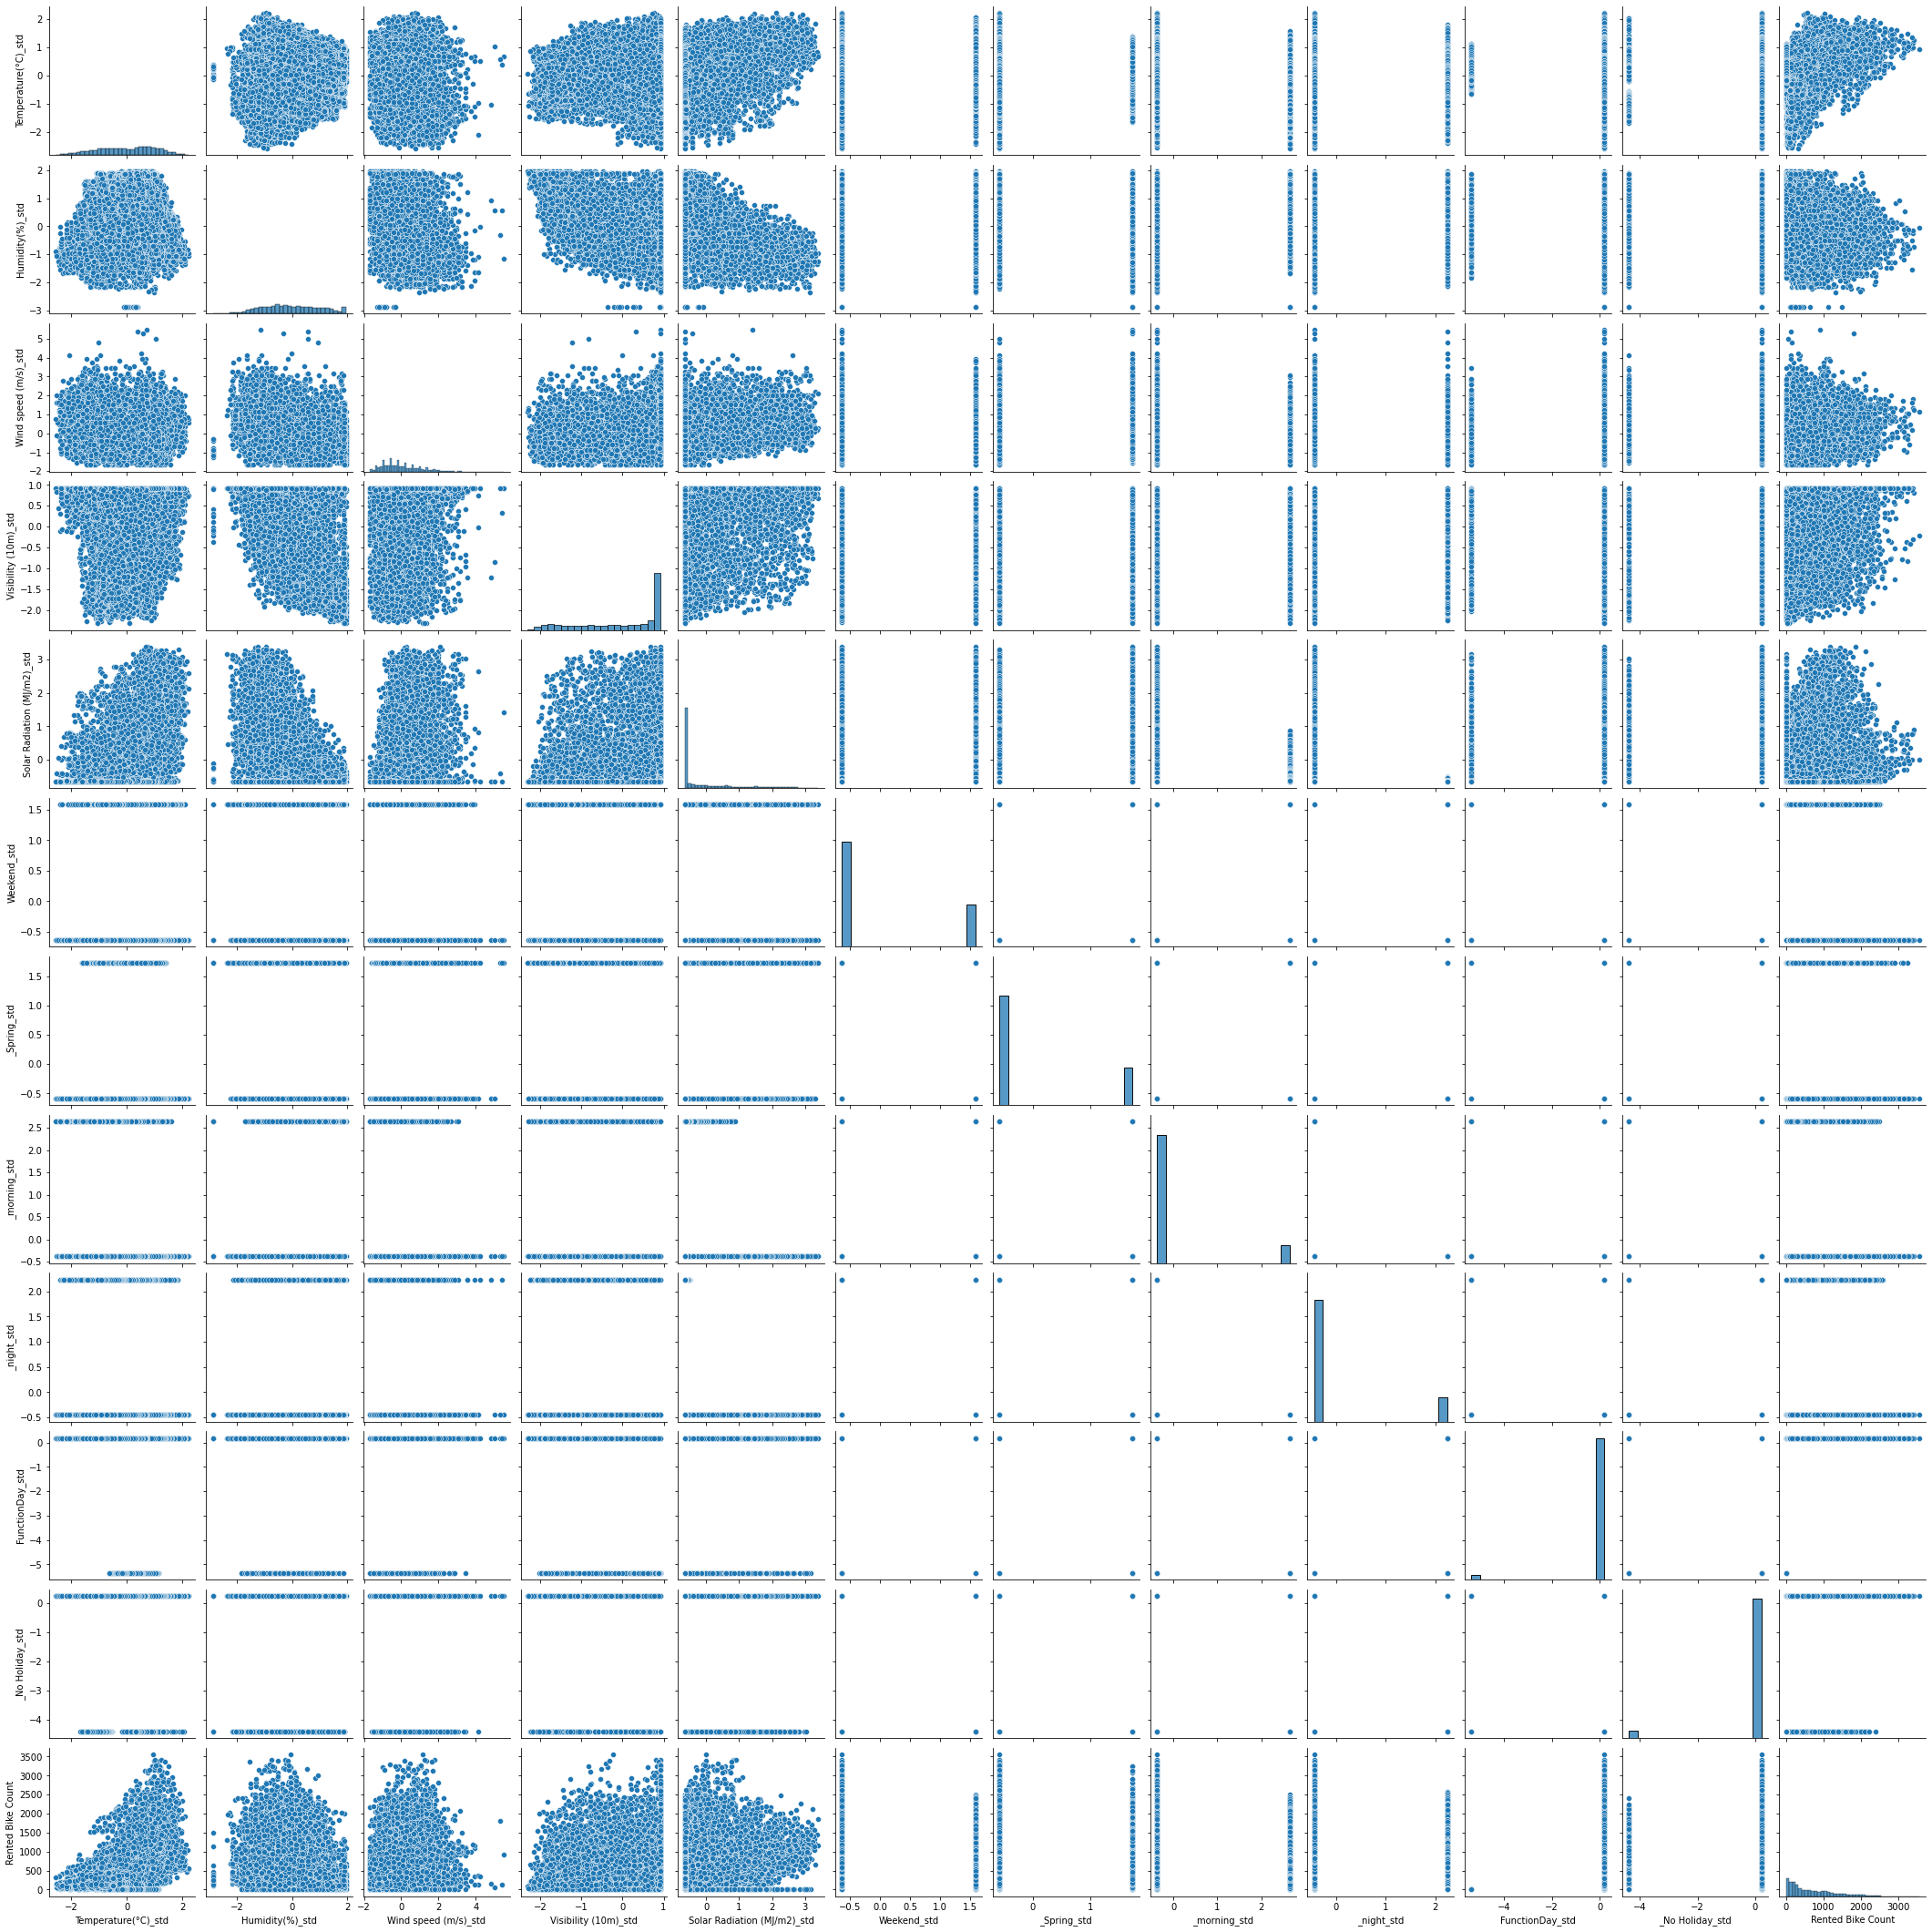

In [84]:
bikeData_feats_e36_std = bikeData_feats_e35_std[['Temperature(°C)_std', 'Humidity(%)_std', 'Wind speed (m/s)_std',
       'Visibility (10m)_std', 
       'Solar Radiation (MJ/m2)_std', 
       'Weekend_std', '_Spring_std', 
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std',
       'Rented Bike Count']]
sns.pairplot(bikeData_feats_e36_std)

In [85]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e36_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_RED_E36",
                                                              "input and output variable scaled\
                                                               reduced few variables",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Weekend_std', '_Spring_std',
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
7       BIKE_LR_ALL_E34_Train     Train   
8        BIKE_LR_ALL_E35_Test      Test   
9       BIKE_LR_ALL_E35_Train     Train   
10   BIKE_LR_STD_RED_E36_Test      Test   
11  BIKE_LR_STD_RED_E36_Train     Train   

                                              Remarks  R-squared  \
7                    input and output variable scaled   0.597506   
8                    input and output variable scaled   0.597506   
9                    input and output variable scaled   0.597506   
10  input and output variable scaled              ...   0.481465   
11  input and output variable scaled              ...   0.481465   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
7         0.596254       2.023010  1.083288e-265     27.853776       0.408048   
8         0.596254       2.023010  1.083288e-265     27.853776  163841.693774   
9         0.596254       2.023010  1.083288e-265     27.853776  169737.350888   
10        0.480533       2.010781   0.000000e+00      3.140462  209505.349861   
11        0.480533       2.010781   0.000000e+00      3.140462  218673.039780   

          RMSE         MAE  
7     0.638786    0.478785  
8   404.773633  311.850464  
9   411.991931  308.797194  
10  457.717544  344.485028  
11  467.624892  345.065875

In [86]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

6.547887035813652e-185


***Observation: Experiment did not improve the hetroskedasticity, and also the model performance have been reduced. So lets leave it here.***

#### 3.3.6 The error terms must follow normal distribution


<AxesSubplot:ylabel='Density'>

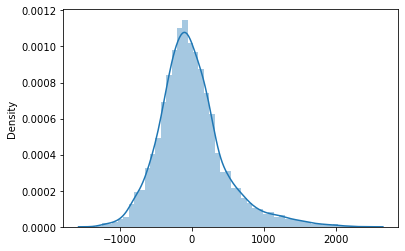

In [87]:
residuals = lr_model.resid
sns.distplot(residuals,kde=True)

In [88]:
JB,JBpv,skew,kurt =sm.stats.stattools.jarque_bera(residuals,axis=0)
JBpv

0.0

##### Experiment 7

In [89]:

bikeData_feats_e37_std = bikeData_feats_e35_std.copy()
bikeData_feats_e37_std = bikeData_feats_e37_std.drop('Rented Bike Count', axis=1)
for i in range(len(bikeData_feats_e37_std.columns)):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(bikeData_feats_e37_std.values,i) for i in range(bikeData_feats_e37_std.shape[1])]
    vif['Features'] = bikeData_feats_e37_std.columns
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
    
    multi = vif[vif.VIF_Factor > 10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor',ascending = False)
        bikeData_feats_e37_std = bikeData_feats_e37_std.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)
        break;


    VIF_Factor                     Features
0     1.335908                     Hour_std
1     5.298687          Temperature(°C)_std
2     2.726153              Humidity(%)_std
3     1.357576         Wind speed (m/s)_std
4     1.705724         Visibility (10m)_std
5     3.709572  Solar Radiation (MJ/m2)_std
6     1.082121             Rainfall(mm)_std
7     1.115892            Snowfall (cm)_std
8     1.006999                  Weekend_std
9     1.718260                  _Spring_std
10    2.636956                  _Summer_std
11    3.400353                  _Winter_std
12    1.629545                 _evening_std
13    1.205783                 _morning_std
14    2.914123            _office_hours_std
15    1.082482              FunctionDay_std
16    1.024980              _No Holiday_std


In [90]:
X = bikeData_feats_e37_std
X = sm.add_constant(X)
Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 
lin_reg_model = sm.OLS(y_train,x_train).fit()
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     520.0
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                -45670.
No. Observations:                6132   AIC:                         9.138e+04
Df Residuals:                    6114   BIC:                         9.150e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         707.6678      5.312    133.224      0.000     697.255     718.081
Hour_std                      179.6652      6.172     29.112      0.000     167.567     191.764
Temperature(°C)_std           300.4334     12.250     24.525      0.000     276.419     324.448
Humidity(%)_std              -147.6736      8.833    -16.718      0.000    -164.990    -130.357
Wind speed (m/s)_std           10.4103      6.247      1.666      0.096      -1.836      22.657
Visibility (10m)_std           10.6469      6.941      1.534      0.125      -2.959      24.253
Solar Radiation (MJ/m2)_std    -2.1959     10.251     -0.214      0.830     -22.291      17.899
Rainfall(mm)_std              -61.7267      5.206    -11.857      0.000     -71.932     -51.522
Snowfall (cm)_std              11.4119      5.720      1.995      0.046       0.199      22.625
Weekend_std                   -38.6576      5.323     -7.263      0.000     -49.092     -28.223
_Spring_std                   -65.6372      6.945     -9.451      0.000     -79.253     -52.022
_Summer_std                   -67.1775      8.583     -7.827      0.000     -84.003     -50.352
_Winter_std                  -154.2970      9.802    -15.742      0.000    -173.512    -135.083
_evening_std                   86.6396      6.776     12.785      0.000      73.355      99.924
_morning_std                   73.2304      5.841     12.538      0.000      61.780      84.680
_office_hours_std             -51.5250      9.048     -5.694      0.000     -69.263     -33.787
FunctionDay_std               169.8385      5.616     30.241      0.000     158.829     180.848
_No Holiday_std                27.4781      5.366      5.121      0.000      16.959      37.997
==============================================================================
Omnibus:                      611.382   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.876
Skew:                           0.716   Prob(JB):                    6.22e-219
Kurtosis:                       4.371   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Fit the Model and store the results
bikeData_feats_e37_std = pd.concat([bikeData_feats_e37_std,bikeData['Rented Bike Count']],axis=1)
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E37",
                                                              "after VIF treatment",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Wind speed (m/s)_std', 'Visibility (10m)_std',
       'Solar Radiation (MJ/m2)_std', 'Rainfall(mm)_std', 'Snowfall (cm)_std',
       'Weekend_std', '_Spring_std', '_Summer_std', '_Winter_std',
       '_evening_std', '_morning_std', '_office_hours_std', 'FunctionDay_std',
       '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
9       BIKE_LR_ALL_E35_Train     Train   
10   BIKE_LR_STD_RED_E36_Test      Test   
11  BIKE_LR_STD_RED_E36_Train     Train   
12   BIKE_LR_STD_VIF_E37_Test      Test   
13  BIKE_LR_STD_VIF_E37_Train     Train   

                                              Remarks  R-squared  \
9                    input and output variable scaled   0.597506   
10  input and output variable scaled              ...   0.481465   
11  input and output variable scaled              ...   0.481465   
12                                after VIF treatment   0.591142   
13                                after VIF treatment   0.591142   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
9         0.596254       2.023010  1.083288e-265     27.853776  169737.350888   
10        0.480533       2.010781   0.000000e+00      3.140462  209505.349861   
11        0.480533       2.010781   0.000000e+00      3.140462  218673.039780   
12        0.590005       2.020755  6.223218e-219      4.870427  167754.919594   
13        0.590005       2.020755  6.223218e-219      4.870427  172420.977154   

          RMSE         MAE  
9   411.991931  308.797194  
10  457.717544  344.485028  
11  467.624892  345.065875  
12  409.578954  318.990340  
13  415.236050  315.672531

#### Experiment 8

Remove the insignificant variables identified from the model statistics

In [92]:
bikeData_feats_e38_std = bikeData_feats_e37_std.drop(['Solar Radiation (MJ/m2)_std','Visibility (10m)_std','Wind speed (m/s)_std'],axis=1)

In [93]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e38_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E38",
                                                              "after VIF treatment, removed insignificant",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Summer_std', '_Winter_std', '_evening_std', '_morning_std',
       '_office_hours_std', 'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
11  BIKE_LR_STD_RED_E36_Train     Train   
12   BIKE_LR_STD_VIF_E37_Test      Test   
13  BIKE_LR_STD_VIF_E37_Train     Train   
14   BIKE_LR_STD_VIF_E38_Test      Test   
15  BIKE_LR_STD_VIF_E38_Train     Train   

                                              Remarks  R-squared  \
11  input and output variable scaled              ...   0.481465   
12                                after VIF treatment   0.591142   
13                                after VIF treatment   0.591142   
14         after VIF treatment, removed insignificant   0.590766   
15         after VIF treatment, removed insignificant   0.590766   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
11        0.480533       2.010781   0.000000e+00      3.140462  218673.039780   
12        0.590005       2.020755  6.223218e-219      4.870427  167754.919594   
13        0.590005       2.020755  6.223218e-219      4.870427  172420.977154   
14        0.589830       2.020015  2.744078e-221      4.268395  167607.017356   
15        0.589830       2.020015  2.744078e-221      4.268395  172579.429291   

          RMSE         MAE  
11  467.624892  345.065875  
12  409.578954  318.990340  
13  415.236050  315.672531  
14  409.398360  318.907936  
15  415.426804  316.012265

In [94]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     630.7
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                -45673.
No. Observations:                6132   AIC:                         9.138e+04
Df Residuals:                    6117   BIC:                         9.148e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 707.6140      5.313    133.188      0.000     697.199     718.029
Hour_std              181.0691      6.075     29.803      0.000     169.159     192.979
Temperature(°C)_std   298.1737     11.496     25.937      0.000     275.637     320.710
Humidity(%)_std      -156.2957      6.471    -24.152      0.000    -168.982    -143.610
Rainfall(mm)_std      -61.4485      5.197    -11.824      0.000     -71.636     -51.261
Snowfall (cm)_std      11.3811      5.710      1.993      0.046       0.187      22.575
Weekend_std           -39.3237      5.316     -7.397      0.000     -49.745     -28.903
_Spring_std           -66.7938      6.634    -10.069      0.000     -79.798     -53.790
_Summer_std           -65.3408      8.544     -7.647      0.000     -82.090     -48.591
_Winter_std          -156.2766      9.610    -16.262      0.000    -175.115    -137.438
_evening_std           87.4922      6.518     13.423      0.000      74.714     100.270
_morning_std           72.1996      5.761     12.533      0.000      60.907      83.493
_office_hours_std     -53.0726      6.465     -8.209      0.000     -65.747     -40.398
FunctionDay_std       169.5462      5.616     30.191      0.000     158.537     180.555
_No Holiday_std        27.2335      5.366      5.075      0.000      16.715      37.752
==============================================================================
Omnibus:                      617.734   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1015.724
Skew:                           0.722   Prob(JB):                    2.74e-221
Kurtosis:                       4.374   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

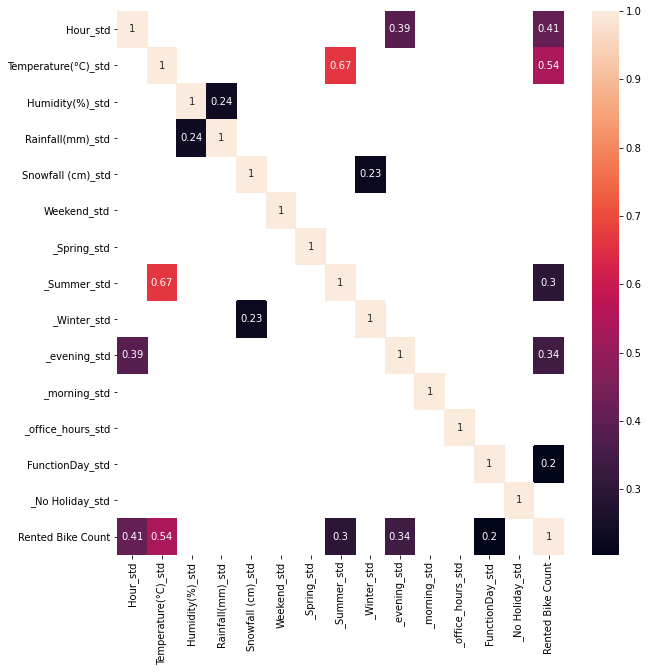

In [95]:
corr = bikeData_feats_e38_std.corr()
corr= corr[corr>0.2]
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

#### Experiment 9

In [96]:
bikeData_feats_e39_std = bikeData_feats_e38_std.drop(['_Summer_std'],axis=1)

In [97]:
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e39_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E39",
                                                              "after VIF treatment, removed insignificant\
                                                              removed collenear variable > 0.6",
                                                               result_table_e3_set,0.3,123)
result_table_e3_set.tail()

Index(['const', 'Hour_std', 'Temperature(°C)_std', 'Humidity(%)_std',
       'Rainfall(mm)_std', 'Snowfall (cm)_std', 'Weekend_std', '_Spring_std',
       '_Winter_std', '_evening_std', '_morning_std', '_office_hours_std',
       'FunctionDay_std', '_No Holiday_std'],
      dtype='object')


Model_Name Data_Type  \
13  BIKE_LR_STD_VIF_E37_Train     Train   
14   BIKE_LR_STD_VIF_E38_Test      Test   
15  BIKE_LR_STD_VIF_E38_Train     Train   
16   BIKE_LR_STD_VIF_E39_Test      Test   
17  BIKE_LR_STD_VIF_E39_Train     Train   

                                              Remarks  R-squared  \
13                                after VIF treatment   0.591142   
14         after VIF treatment, removed insignificant   0.590766   
15         after VIF treatment, removed insignificant   0.590766   
16  after VIF treatment, removed insignificant    ...   0.586854   
17  after VIF treatment, removed insignificant    ...   0.586854   

    Adj. R-squared  Durbin_Watson        JB_Prob  Condition_No            MSE  \
13        0.590005       2.020755  6.223218e-219      4.870427  172420.977154   
14        0.589830       2.020015  2.744078e-221      4.268395  167607.017356   
15        0.589830       2.020015  2.744078e-221      4.268395  172579.429291   
16        0.585976       2.021772  1.726324e-196      3.445593  169154.919742   
17        0.585976       2.021772  1.726324e-196      3.445593  174229.426759   

          RMSE         MAE  
13  415.236050  315.672531  
14  409.398360  318.907936  
15  415.426804  316.012265  
16  411.284475  320.690067  
17  417.407986  317.735456

#### Comparision with other models

In [98]:
bikeData_feats_e32
col_name = bikeData_feats_e32.columns.values.tolist()
nm_chng = {'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour','Temperature(°C)': 'temp',
           'Humidity(%)': 'humidity','Wind speed (m/s)': 'wind_speed','Visibility (10m)': 'visibility',
           'Dew point temperature(°C)': 'dp_temp','Solar Radiation (MJ/m2)': 'solar_rad','Rainfall(mm)': 'rainfall',
           'Snowfall (cm)': 'snowfall', 'Seasons': 'seasons','_No Holiday': 'holiday','FunctionDay': 'func_day'}
bikeData = bikeData_feats_e32.rename(columns = nm_chng)
bikeData.head()

bike_count  hour  temp  humidity  wind_speed  visibility  solar_rad  \
0         254     0  -5.2        37         2.2        2000        0.0   
1         204     1  -5.5        38         0.8        2000        0.0   
2         173     2  -6.0        39         1.0        2000        0.0   
3         107     3  -6.2        40         0.9        2000        0.0   
4          78     4  -6.0        36         2.3        2000        0.0   

   rainfall  snowfall  Weekend  _Spring  _evening  _morning  _night  \
0       0.0       0.0        0        0         0         0       0   
1       0.0       0.0        0        0         0         0       0   
2       0.0       0.0        0        0         0         0       0   
3       0.0       0.0        0        0         0         0       0   
4       0.0       0.0        0        0         0         0       0   

   _office_hours  func_day  holiday  
0              0         1        1  
1              0         1        1  
2              0         1        1  
3              0         1        1  
4              0         1        1

In [99]:
# Splitting the dataset to Train and Test datasets with 'bike_count'
y = bikeData['bike_count']
X = bikeData.drop('bike_count', axis = 1)

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

### a. Linear regression

In [100]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
 
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.5580140585078135


### b. Ridge(L2) Regression

In [101]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -59.9946179335586
0.5 : -59.924672833903735
0.75 : -59.85681174302924
1.0 : -59.79094818177764
1.25 : -59.72699996392379
1.5 : -59.66488894812853
1.75 : -59.604540806259635
2.0 : -59.54588480686641


In [102]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.5581440194622271


### c. Lasso(L1) Regression:

In [103]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : -59.301149476873015
0.5 : -58.719674283611255
0.75 : -58.35804076582167
1.0 : -58.1787482132582
1.25 : -57.90207994435526
1.5 : -57.50908503179417
1.75 : -57.1606399814789
2.0 : -56.90592657065605


In [104]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.09)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.5562540039215729


In [105]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Ridge  Regreesion'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso  Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regreesion : 0.5580140585078135
Ridge  Regreesion : 0.5581440194622271
Lasso  Regression : 0.5562540039215729


In [106]:
y_pred = linearModel.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.5580140585078135
mean_absolute_error : 323.0411952412273
mean_squared_error :  185575.4419749277
root_mean_squared_error :  430.7846816855582


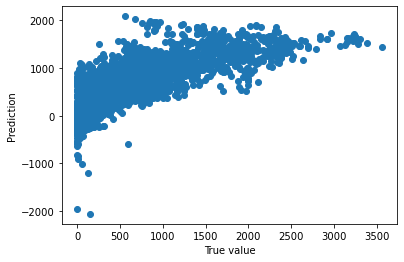

In [107]:
y_pred = linearModel.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

### d. Random Forest Regressor

In [108]:
rc = RandomForestRegressor(n_estimators= 100, criterion= 'mse')
rc.fit(X_train, y_train)
cv = cross_validate(rc, X_train, y_train, cv = 10)
print(cv)

{'fit_time': array([1.90700245, 1.90812588, 2.18274951, 1.94584394, 1.95311069,
       2.06146836, 2.12520671, 2.04631972, 2.11964893, 2.14427662]), 'score_time': array([0.02523518, 0.02895403, 0.03091908, 0.02393651, 0.0268662 ,
       0.02593112, 0.02986455, 0.02792907, 0.03110766, 0.0259285 ]), 'test_score': array([0.91154522, 0.90094465, 0.90120716, 0.90351868, 0.91711786,
       0.90972663, 0.90662692, 0.9059236 , 0.92299877, 0.89889726])}


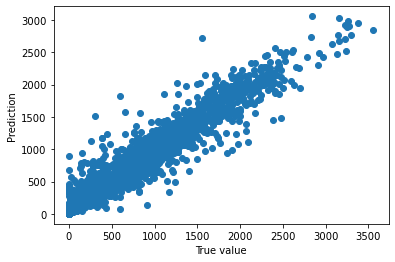

In [109]:
y_pred = rc.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()
plt.close()

In [110]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R-Square Value 0.9193327774004216
mean_absolute_error : 116.46695585996957
mean_squared_error :  33869.52860144596
root_mean_squared_error :  184.0367588321582


### e. Grid Search

In [111]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,y)
print("R-Squared on train dataset={}".format(dtm.score(X_train,y_train)))

dtm.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.6529261961121149
R-Squaredon test dataset=0.6564507935973357


In [ ]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,y)

In [ ]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))